### Notes
- In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
data  = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")

In [3]:
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
data.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
data.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [25]:
## Data prep
data_prep = data.copy()

In [26]:
cat_cols = list(data_prep.select_dtypes(include='object').columns)
num_cols = list(data_prep.select_dtypes(exclude='object').columns)

In [27]:
cat_cols

['lead_source', 'industry', 'employment_status', 'location']

In [28]:
data_prep[cat_cols] = data_prep[cat_cols].fillna("NA")

In [29]:
data_prep[num_cols] = data_prep[num_cols].fillna(0)

In [30]:
data_prep.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [31]:
data_prep.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [32]:
from sklearn.model_selection import train_test_split

In [34]:
df_full_train, df_test = train_test_split(data_prep, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [35]:
df_full_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
98,referral,NA,1,56659.0,employed,asia,4,0.75,1
1188,social_media,education,2,66171.0,unemployed,north_america,2,0.66,0
1407,events,finance,1,66523.0,self_employed,europe,3,0.64,1
1083,social_media,finance,1,56746.0,student,north_america,3,0.98,0
404,referral,NA,0,55449.0,student,australia,4,0.47,0
...,...,...,...,...,...,...,...,...,...
715,referral,NA,2,35103.0,unemployed,africa,0,0.88,0
905,social_media,other,1,66006.0,employed,south_america,5,0.64,1
1096,events,finance,2,73688.0,self_employed,asia,2,0.07,0
235,referral,technology,2,76723.0,employed,north_america,3,0.49,1


In [37]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [38]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [39]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [40]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [44]:
num_cols_new = ['number_of_courses_viewed',
                'annual_income',
                'interaction_count',
                'lead_score']

In [45]:
df_train["number_of_courses_viewed"]

462     2
135     1
117     2
1051    2
945     0
       ..
39      5
1261    6
595     1
1329    1
269     0
Name: number_of_courses_viewed, Length: 876, dtype: int64

In [47]:
for col in num_cols_new:
    auc = roc_auc_score(y_train, df_train[col])
    print(f"{col}: {auc}")

number_of_courses_viewed: 0.7635680590007088
annual_income: 0.5519578313253012
interaction_count: 0.738270176293409
lead_score: 0.6144993577250176


In [48]:
from sklearn.feature_extraction import DictVectorizer


def data_preprocessing(df):
    dv = DictVectorizer(sparse=False)

    data_dict = df[num_cols_new + cat_cols].to_dict(orient='records')
    train_data = dv.fit_transform(data_dict)
    return train_data
# train_dict = df_train[categorical_fill+numerical_fill].to_dict(orient='records')
# X_train = dv.fit_transform(train_dict)

In [49]:
X_train = data_preprocessing(df_train)

In [52]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [56]:
X_val = data_preprocessing(df_val)

In [60]:
y_pred_prob = model.predict_proba(X_val)[:, 1]

In [61]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [62]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1])

In [65]:
roc_auc_score(y_val,y_pred)

0.647564950627936

In [72]:
thresholds  = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [73]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)


    return df_scores

In [74]:
df_scores_val = tpr_fpr_dataframe(y_val, y_pred)

In [75]:
df_scores_val

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,171,122,0,0,1.000000,1.000000
1,0.01,164,81,7,41,0.959064,0.663934
2,0.02,164,81,7,41,0.959064,0.663934
3,0.03,164,81,7,41,0.959064,0.663934
4,0.04,164,81,7,41,0.959064,0.663934
...,...,...,...,...,...,...,...
96,0.96,164,81,7,41,0.959064,0.663934
97,0.97,164,81,7,41,0.959064,0.663934
98,0.98,164,81,7,41,0.959064,0.663934
99,0.99,164,81,7,41,0.959064,0.663934


In [79]:
import matplotlib.pyplot as plt

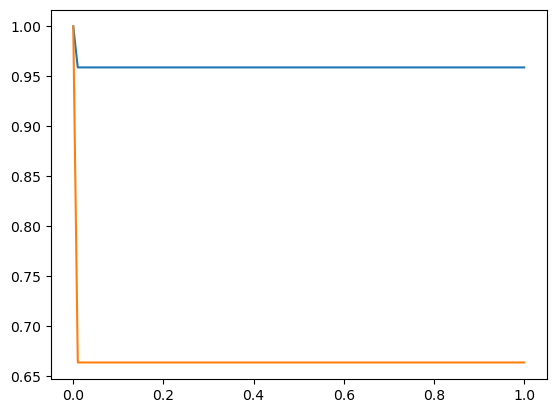

In [81]:
plt.plot(df_scores_val['threshold'], df_scores_val['tpr'], label='tpr')
plt.plot(df_scores_val['threshold'], df_scores_val['fpr'], label='fpr')

In [82]:
df_scores_val['f1'] = 2 * (df_scores_val['tpr']*df_scores_val['fpr']) / (df_scores_val['tpr'] + df_scores_val['fpr'])

In [83]:
df_scores_val

,threshold,tp,fp,fn,tn,tpr,fpr,f1
0,0.00,171,122,0,0,1.000000,1.000000,1.000000
1,0.01,164,81,7,41,0.959064,0.663934,0.784666
2,0.02,164,81,7,41,0.959064,0.663934,0.784666
3,0.03,164,81,7,41,0.959064,0.663934,0.784666
4,0.04,164,81,7,41,0.959064,0.663934,0.784666
...,...,...,...,...,...,...,...,...
96,0.96,164,81,7,41,0.959064,0.663934,0.784666
97,0.97,164,81,7,41,0.959064,0.663934,0.784666
98,0.98,164,81,7,41,0.959064,0.663934,0.784666
99,0.99,164,81,7,41,0.959064,0.663934,0.784666


In [86]:
def train(df_train, y_train):
    dicts = df_train[cat_cols + num_cols_new].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [87]:
def predict(df, dv, model):
    dicts = df[cat_cols + num_cols_new].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [88]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
print(f"std of auc: {np.std(scores)}")

std of auc: 0.03580711942905165


In [89]:
from tqdm.auto import tqdm

In [92]:
def train(df_train, y_train,C):
    dicts = df_train[cat_cols + num_cols_new].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


for C in tqdm([0.000001, 0.001, 1]):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.converted.values
        y_val = df_val.converted.values
    
        dv, model = train(df_train, y_train,C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"mean of auc for C {C}: {np.mean(scores)}")

  0%|          | 0/3 [00:00<?, ?it/s]

mean of auc for C 1e-06: 0.560207852870275
mean of auc for C 0.001: 0.8668780317675395
mean of auc for C 1: 0.8221089148573075
